# Clasificación Tumores: Análisis de parámetros médicos
### Predecir si un paciente tiene un tumor maligno o benigno

- Definición del Problema
- Reunir la Información
- Realizar Análisis Exploratorio
- "Feature Engineering" (Ingeniería de Características)
- Modelado
- Pruebas

![String Indexes](/workspaces/Principal/tumores-hepaticos-1-1100x408.jpg)

## 1. Definición del Problema

Se realiza una serie de examenes a tejidos anormales a una serie de pacientes, el resultado de estos examenes da lugar a una serie de métricas relacionadas con un tumor.

El objetivo del análisis a desarrollar es clasificar en base a la métricas obtenidas si un tumor es maligno o benigno, esto con el fin de realizar las intervenciones médicas de la forma más optima posible.

![Medico Image]( 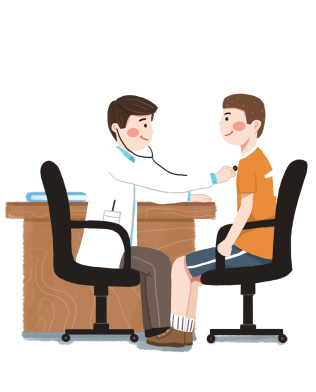)

## 2. Cargar la Información

Primero se debe descargar el dataset desde el sistema LOA, a continuación y lo deberán guardar en una carpeta dentro de su Google Drive.

El trabajo consta de dos datasets:

* train: Debera ser análizado y utilizado para entrenar sus modelos de clasificación, **para esto se recomienda dividir el dataset, en train y test**.

* test: Corresponde a los registros que se deben predecir, y que debe ser incluido en la entrega de su trabajo.

### 2.1 Aclaración recordar generar un conjunto de datos para test::: y training

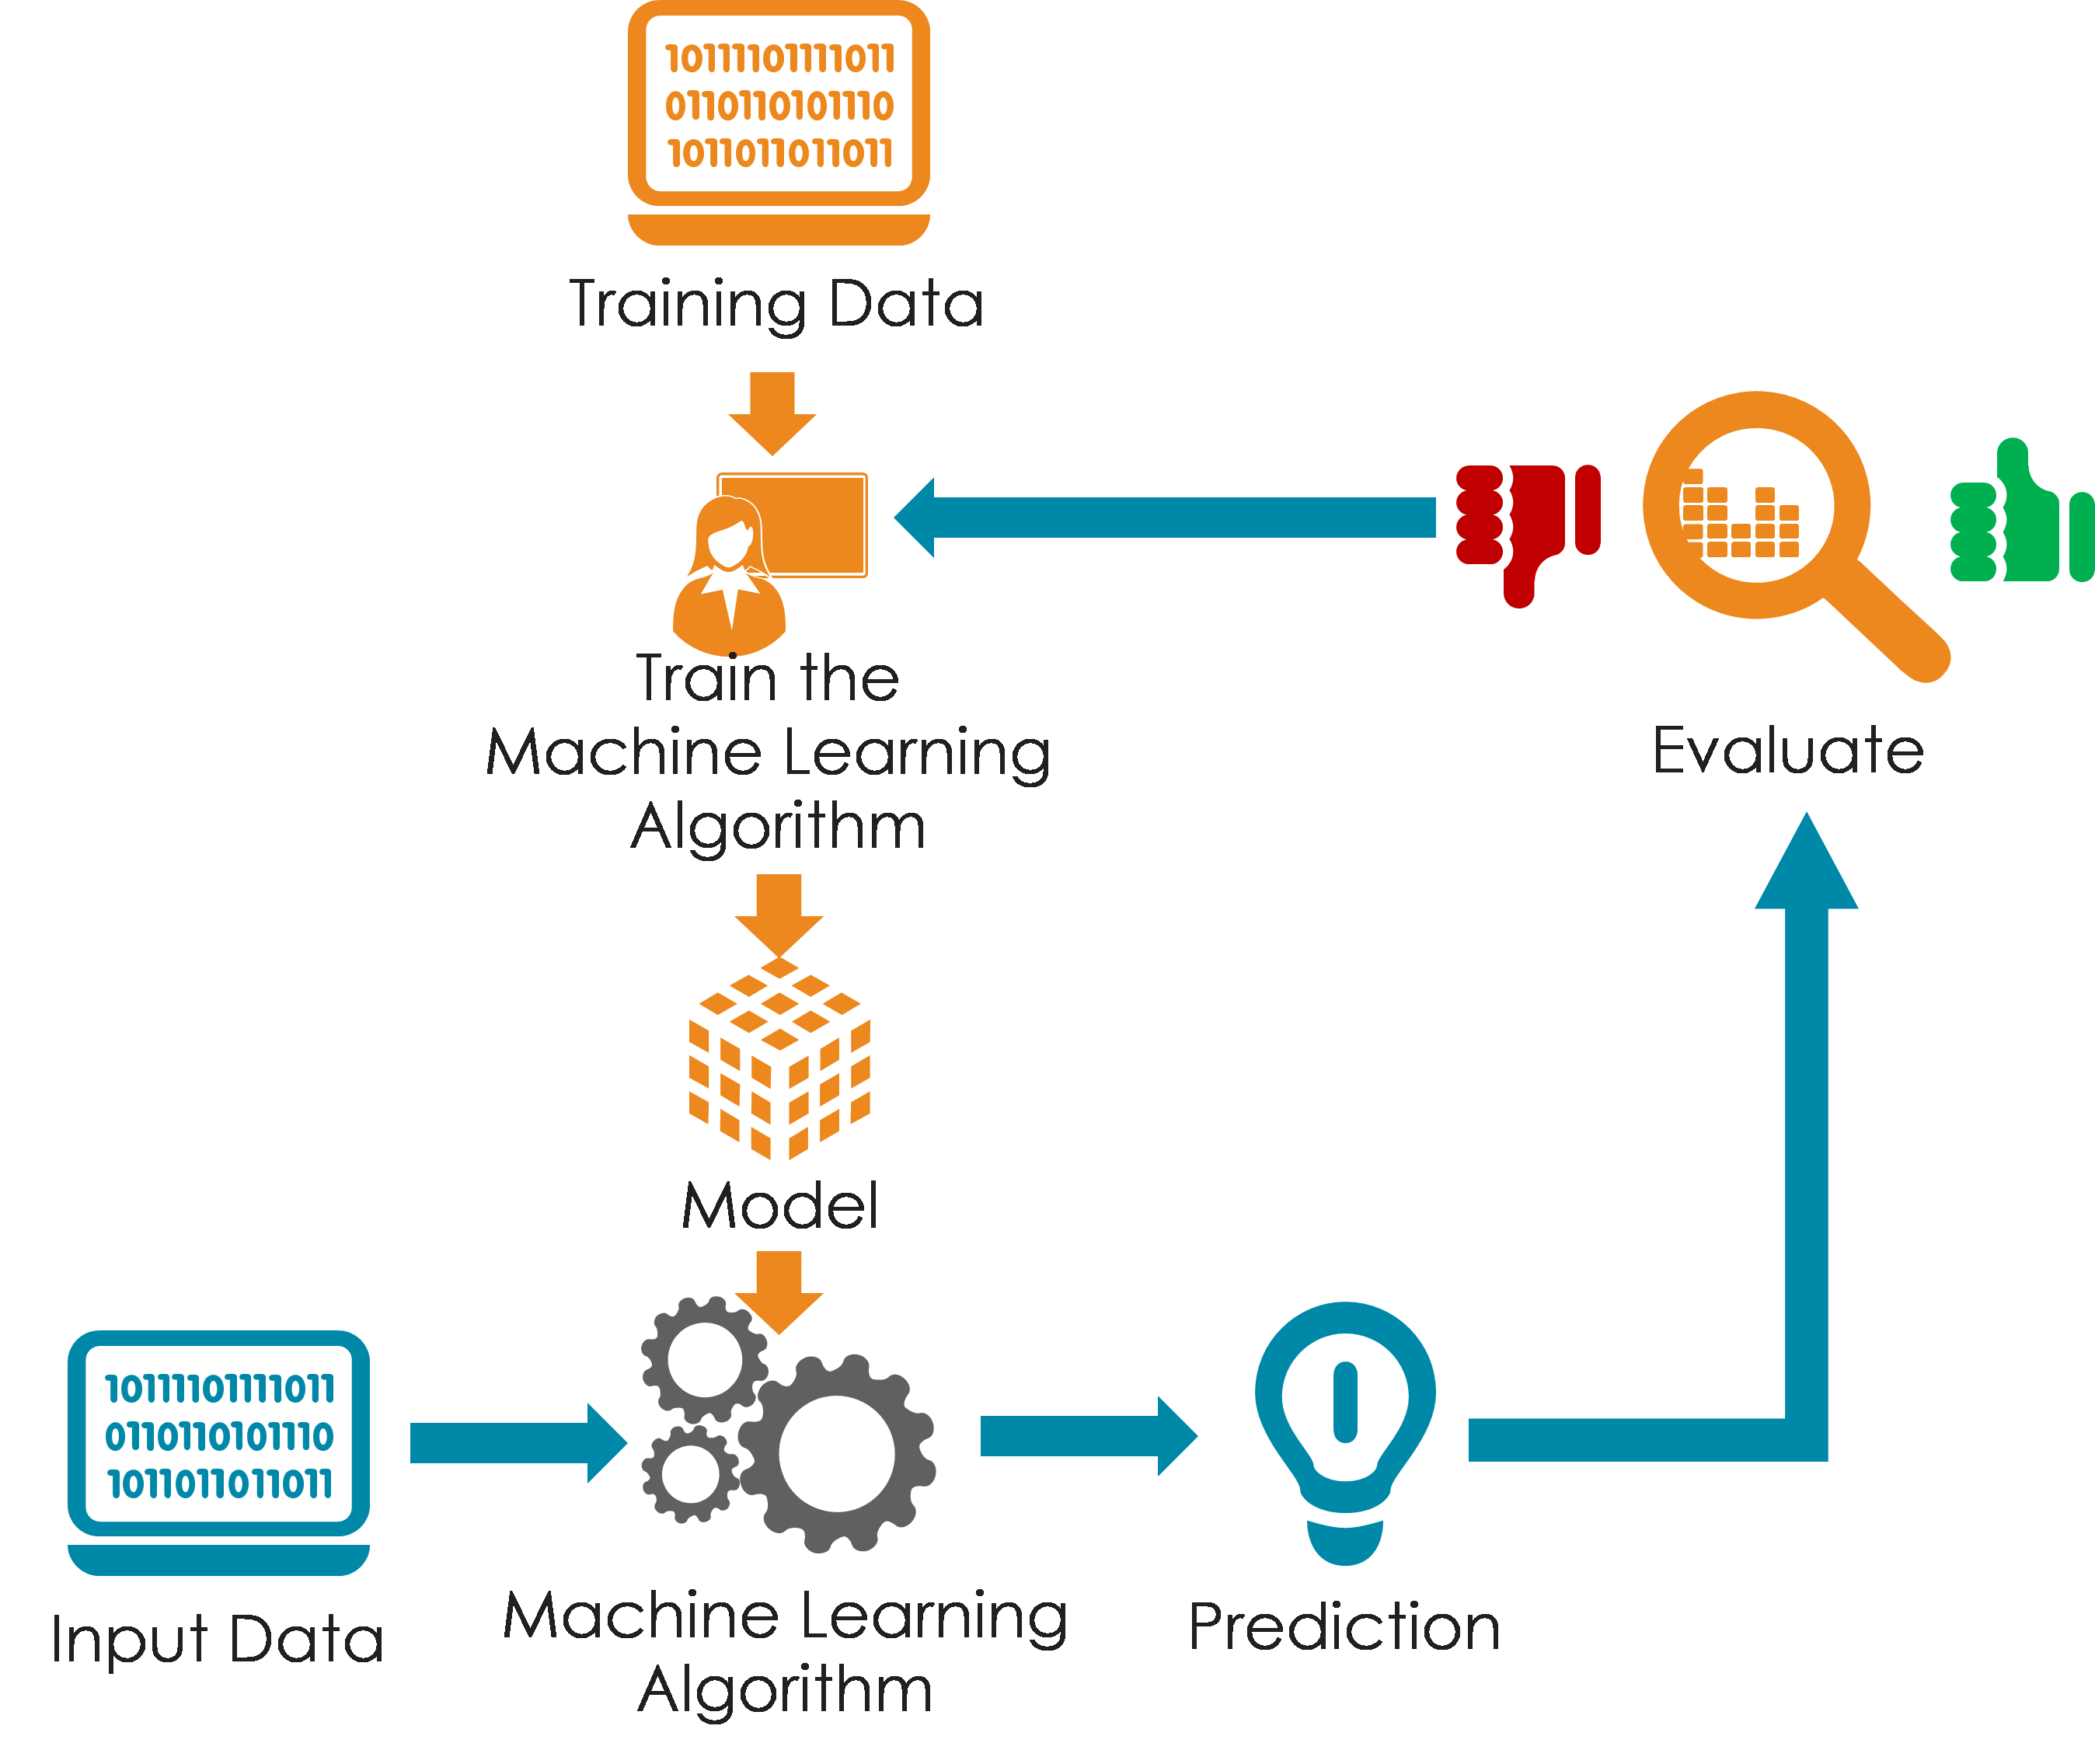

In [3]:
import pandas as pd #Librería de data frames
import seaborn as sns #Librería de Gráficos común
import matplotlib.pyplot as plt #Librería de gráficos
import numpy as np #Librería de Ciencia de Datos común

Leer y explorar Datos

In [4]:
df=pd.read_csv("/workspaces/Principal/cancer-data-train.csv")
Testear=pd.read_csv("/workspaces/Principal/cancer-data.csv")

In [5]:
df.head(10)

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
0,100,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,101,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,102,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,103,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,104,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678
5,105,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,106,M,18.25,19.98,119.60,1040.0,0.09463,109.00000,0.11270,74.00000,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,107,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,108,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,539.0000,206.0000,0.4378,0.10720
9,109,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1058.0000,1105.0000,221.0000,0.4366,0.20750


In [10]:
df.tail()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
528,628,B,13.94,13.17,90.31,594.2,0.12480,0.09755,NaN,0.06615,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,216.0000,0.07253
529,629,B,12.07,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,...,13.45,15.77,86.92,549.9,0.1521,0.1632,0.1622,0.07393,0.2781,0.08052
530,630,B,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.1366,101.00000,0.2478,0.07757
531,631,B,11.67,20.02,75.21,416.2,0.10160,0.09453,42.00000,0.02157,...,13.35,28.81,87.00,550.6,155.0000,0.2964,0.2758,0.08120,0.3206,0.08950
532,632,B,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782


In [7]:
Testear.head()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
0,633,NaN,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,...,11.62,26.51,76.43,407.5,0.1428,251.0000,0.2123,0.09861,0.2289,0.08278
1,634,NaN,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,...,24.30,25.48,160.20,1809.0,0.1268,0.3135,0.4433,0.21480,0.3077,0.07569
2,635,NaN,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,...,15.29,34.27,104.30,728.3,138.0000,0.2733,0.4234,0.13620,0.2698,0.08351
3,636,NaN,11.69,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,...,12.98,32.19,86.12,487.7,0.1768,0.3251,0.1395,0.13080,0.2803,0.09970
4,637,NaN,7729.00,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,9077.00,30.92,57.17,248.0,0.1256,0.0834,0.0000,0.00000,0.3058,0.09938


In [8]:
df.shape

(533, 32)

In [9]:
Testear.shape

(35, 32)

Demasiadas variables y una que no es númerica (la objetivo)

In [10]:
df.isnull().sum() #Valores null dentro de las variables

id                         0
diagnostico                0
radio_medio                0
textura_media              0
perimetro_medio            0
area_media                 0
suavidad_media             0
compactacion_media         3
concavidad_media           5
puntos_concavos_medios     0
simteria_media             0
dimension_fractal_media    0
radio_es                   6
testura_es                 0
perimetro_es               0
area_es                    0
suavidad_es                0
compactacion_es            7
concavidad_es              0
concave points_se          0
simetria_es                0
dimension_fractal_es       0
radius_worst               7
textura_w                  0
perimetro_w                4
area_w                     0
suavidad_w                 0
compactacion_w             0
concavidad_w               8
puntos_concavidad_w        0
simetria_worst             6
dimension_fractal_worst    5
dtype: int64

In [11]:
Testear.isnull().sum()

id                          0
diagnostico                35
radio_medio                 0
textura_media               0
perimetro_medio             0
area_media                  0
suavidad_media              0
compactacion_media          0
concavidad_media            0
puntos_concavos_medios      0
simteria_media              0
dimension_fractal_media     0
radio_es                    0
testura_es                  0
perimetro_es                0
area_es                     0
suavidad_es                 0
compactacion_es             0
concavidad_es               0
concave points_se           0
simetria_es                 0
dimension_fractal_es        0
radius_worst                0
textura_w                   0
perimetro_w                 0
area_w                      0
suavidad_w                  0
compactacion_w              0
concavidad_w                0
puntos_concavidad_w         0
simetria_worst              0
dimension_fractal_worst     0
dtype: int64

Si se eliminara toda la data por filas que tiene valores null en el peor de los casos se pierden 51 datos de 533 (poco menos del 10%, pero aún así un valor considerable, ua que es mayor al 5% despreciable y en un modelo con menos de 1000 datos cada uno es muy importante)

In [12]:
df.describe() #Revisar si hay datos anomalos

,id,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,simteria_media,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,530.000000,528.000000,533.000000,533.00000,...,526.000000,533.000000,529.000000,533.000000,533.000000,533.000000,525.000000,533.000000,527.000000,528.000000
mean,366.000000,671.408818,18.976923,92.366098,659.422326,4.381297,3.968499,7.118554,2.238544,15.92739,...,269.274449,25.343077,107.826843,889.904878,10.060978,25.854984,27.484467,8.833293,29.776501,1.875725
std,154.008117,2378.656876,4.134037,24.010647,350.381776,21.251338,23.480917,34.570394,15.368472,52.70258,...,1531.241366,6.040284,33.366983,571.462062,36.341165,98.624434,116.590877,39.173873,90.515726,14.034189
min,100.000000,8.950000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.11670,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,233.000000,12.250000,16.020000,75.710000,427.900000,0.086730,0.065307,0.029950,0.020540,0.16340,...,13.240000,20.830000,84.530000,521.500000,0.118100,0.151600,0.121100,0.065480,0.255650,0.071733
50%,366.000000,13.850000,18.600000,86.600000,553.500000,0.096670,0.094575,0.066145,0.035100,0.18130,...,15.140000,25.110000,97.960000,688.900000,0.134200,0.230200,0.257300,0.101800,0.290100,0.080075
75%,499.000000,17.570000,21.510000,104.700000,793.200000,0.106400,0.132725,0.144800,0.077520,0.20260,...,19.792500,29.150000,125.900000,1095.000000,0.150300,0.385600,0.442900,0.172700,0.332150,0.092095
max,632.000000,9904.000000,39.280000,188.500000,2501.000000,123.000000,219.000000,313.000000,162.000000,304.00000,...,9981.000000,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000


Todos en los valores máximos.
* Radio medio presenta anomalía, pero perímetro medio no.
* area media presenta anomalía.
* suavidad media presenta anomalía.
* compactación media presenta anomalía.
* concavidad media presenta anomalía.
* puntos concavos medios presenta anomalía.
* simetria media presenta anomalía.
* rimension fractal presenta anomalía
* radio_es presenta anomalía
* compactación_es presenta anomalía
* concavidad_es presenta anomalía.
* concave points_se presenta anomalía.
* simetria_es presenta anomalía.
* dimension_fractal_es presenta anomalía.
* radius_worst presenta anomalía.
* suavidad_w presenta anomalía.
* compactacion_w presenta anomalía.
* concavidad_w presenta anomalía.
* puntos_concavidad_w presenta anomalía.
* simetria_worst presenta anomalía.
* dimension_fractal_worst presenta anomalía.

Raro
* radio_es no ve relación numérica con perimetro_es
* concavidad media faltan datos
* compactacion_media faltan datos
* concavidad_media faltan datos
* radio_es faltan datos
* compactacion_es faltan datos
* radius_worst faltan datos
* perimetro_w faltan datos
* concavidad_w faltan datos
* simetria_worst faltan datos
* dimension_fractal_worst faltan datos

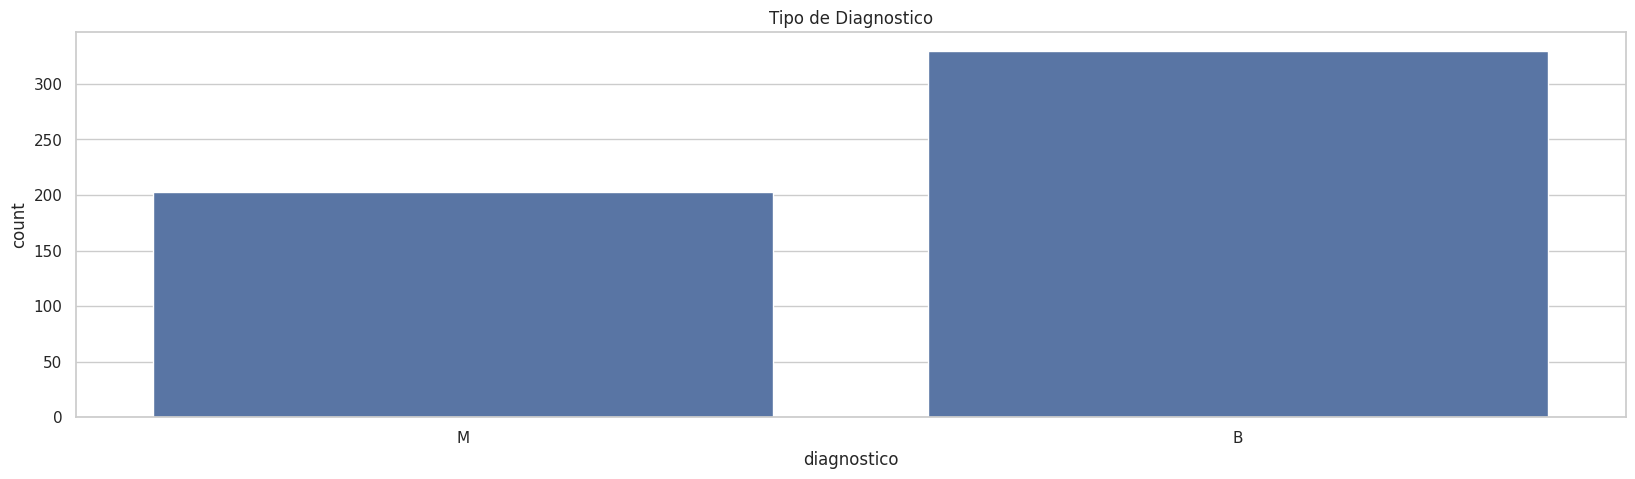

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax=sns.countplot(x=df.diagnostico, data = df)
ax.set_title("Tipo de Diagnostico")
plt.show()

Limpiar valores raros y cambiar a numérico la variable de estudio

In [14]:
df.loc[df["diagnostico"]=="M", "diagnostico"]=1 #Vamos a decir que nuestro "éxito" es Maligno solo por arbitrariedad para el estudio
df.loc[df["diagnostico"]=="B", "diagnostico"]=0
df['diagnostico']=pd.to_numeric(df['diagnostico']).astype(int)

In [15]:
#Corregir valores anómalos
df2=df.copy()
df2.loc[df2["radio_medio"]>30, "radio_medio"]=df2["radio_medio"]/1000
df2.loc[df2["area_media"]>1000, "area_media"]=df2["area_media"]/10
df2.loc[df2["suavidad_media"]>30, "suavidad_media"]=df2["suavidad_media"]/1000
df2.loc[df2["compactacion_media"]>30, "compactacion_media"]=df2["compactacion_media"]/1000
df2.loc[df2["concavidad_media"]>30, "concavidad_media"]=df2["concavidad_media"]/1000
df2.loc[df2["puntos_concavos_medios"]>30, "puntos_concavos_medios"]=df2["puntos_concavos_medios"]/1000
df2.loc[df2["simteria_media"]>30, "simteria_media"]=df2["simteria_media"]/1000
df2.loc[df2["dimension_fractal_media"]>30, "dimension_fractal_media"]=df2["dimension_fractal_media"]/1000
df2.loc[df2["radio_es"]>30, "radio_es"]=df2["radio_es"]/10000
df2.loc[df2["perimetro_es"]>30, "perimetro_es"]=df2["perimetro_es"]/1000
df2.loc[df2["area_es"]>70, "area_es"]=df2["area_es"]/100
df2.loc[df2["compactacion_es"]>30, "compactacion_es"]=df2["compactacion_es"]/1000
df2.loc[df2["concavidad_es"]>30, "concavidad_es"]=df2["concavidad_es"]/10000
df2.loc[df2["concave points_se"]>3, "concave points_se"]=df2["concave points_se"]/1000
df2.loc[df2["simetria_es"]>1, "simetria_es"]=df2["simetria_es"]/1000
df2.loc[df2["dimension_fractal_es"]>1, "dimension_fractal_es"]=df2["dimension_fractal_es"]/1000
df2.loc[df2["radius_worst"]>30, "radius_worst"]=df2["radius_worst"]/1000
df2.loc[df2["suavidad_w"]>30, "suavidad_w"]=df2["suavidad_w"]/1000
df2.loc[df2["compactacion_w"]>30, "compactacion_w"]=df2["compactacion_w"]/10000
df2.loc[df2["concavidad_w"]>30, "concavidad_w"]=df2["concavidad_w"]/10000
df2.loc[df2["puntos_concavidad_w"]>30, "puntos_concavidad_w"]=df2["puntos_concavidad_w"]/1000
df2.loc[df2["simetria_worst"]>30, "simetria_worst"]=df2["simetria_worst"]/1000
df2.loc[df2["dimension_fractal_worst"]>30, "dimension_fractal_worst"]=df2["dimension_fractal_worst"]/1000

In [16]:
T2=Testear.copy()
T2.loc[T2["radio_medio"]>30, "radio_medio"]=T2["radio_medio"]/1000
T2.loc[T2["area_media"]>1000, "area_media"]=T2["area_media"]/10
T2.loc[T2["suavidad_media"]>30, "suavidad_media"]=T2["suavidad_media"]/1000
T2.loc[T2["compactacion_media"]>30, "compactacion_media"]=T2["compactacion_media"]/1000
T2.loc[T2["concavidad_media"]>30, "concavidad_media"]=T2["concavidad_media"]/1000
T2.loc[T2["puntos_concavos_medios"]>30, "puntos_concavos_medios"]=T2["puntos_concavos_medios"]/1000
T2.loc[T2["simteria_media"]>30, "simteria_media"]=T2["simteria_media"]/1000
T2.loc[T2["dimension_fractal_media"]>30, "dimension_fractal_media"]=T2["dimension_fractal_media"]/1000
T2.loc[T2["radio_es"]>30, "radio_es"]=T2["radio_es"]/10000
T2.loc[T2["perimetro_es"]>30, "perimetro_es"]=T2["perimetro_es"]/1000
T2.loc[T2["area_es"]>70, "area_es"]=T2["area_es"]/100
T2.loc[T2["compactacion_es"]>30, "compactacion_es"]=T2["compactacion_es"]/1000
T2.loc[T2["concavidad_es"]>30, "concavidad_es"]=T2["concavidad_es"]/10000
T2.loc[T2["concave points_se"]>3, "concave points_se"]=T2["concave points_se"]/1000
T2.loc[T2["simetria_es"]>1, "simetria_es"]=T2["simetria_es"]/1000
T2.loc[T2["dimension_fractal_es"]>1, "dimension_fractal_es"]=T2["dimension_fractal_es"]/1000
T2.loc[T2["radius_worst"]>30, "radius_worst"]=T2["radius_worst"]/1000
T2.loc[T2["suavidad_w"]>30, "suavidad_w"]=T2["suavidad_w"]/1000
T2.loc[T2["compactacion_w"]>30, "compactacion_w"]=T2["compactacion_w"]/10000
T2.loc[T2["concavidad_w"]>30, "concavidad_w"]=T2["concavidad_w"]/10000
T2.loc[T2["puntos_concavidad_w"]>30, "puntos_concavidad_w"]=T2["puntos_concavidad_w"]/1000
T2.loc[T2["simetria_worst"]>30, "simetria_worst"]=T2["simetria_worst"]/1000
T2.loc[T2["dimension_fractal_worst"]>30, "dimension_fractal_worst"]=T2["dimension_fractal_worst"]/1000

In [17]:
df2.describe()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,530.000000,528.000000,533.000000,...,526.000000,533.000000,529.000000,533.000000,533.000000,533.000000,525.000000,533.000000,527.000000,528.000000
mean,366.000000,0.380863,14.186773,18.976923,92.366098,469.672608,0.096655,0.104442,0.123662,0.189938,...,15.858442,25.343077,107.826843,889.904878,0.132830,0.232781,0.251000,0.209655,0.291784,0.083958
std,154.008117,0.486055,3.485278,4.134037,24.010647,222.844788,0.014082,0.052480,0.783450,1.881775,...,4.730730,6.040284,33.366983,571.462062,0.022998,0.159177,0.202839,1.524228,0.062474,0.018101
min,100.000000,0.000000,6.981000,9.710000,43.790000,100.100000,0.062510,0.019380,0.000000,0.000000,...,0.030670,12.020000,50.410000,185.200000,0.071170,0.008500,0.000000,0.000000,0.156500,0.055040
25%,233.000000,0.000000,11.760000,16.020000,75.710000,321.600000,0.086620,0.065005,0.029950,0.020540,...,13.010000,20.830000,84.530000,521.500000,0.117000,0.120200,0.084340,0.065480,0.252000,0.071733
50%,366.000000,0.000000,13.400000,18.600000,86.600000,466.500000,0.096460,0.092525,0.064905,0.034850,...,14.905000,25.110000,97.960000,688.900000,0.131600,0.197500,0.193700,0.101700,0.282900,0.080025
75%,499.000000,1.000000,16.020000,21.510000,104.700000,602.900000,0.105900,0.130500,0.132325,0.075070,...,18.227500,29.150000,125.900000,1095.000000,0.146700,0.325300,0.375900,0.165900,0.319600,0.092065
max,632.000000,1.000000,28.110000,39.280000,188.500000,998.900000,0.163400,0.345400,18.000000,28.000000,...,30.000000,49.540000,251.200000,4254.000000,0.222600,0.937900,0.960800,25.000000,0.663800,0.207500


Aún fallas en:

*   Elemento de la lista

*   Elemento de la lista
*   Elemento de la lista


*   Elemento de la lista


* concavidad_media
* puntos_concavos_medios
* perimetro_es
* compactacion_es
* concavidad_es
* puntos_concavidad_w

In [18]:
df2.loc[df2["concavidad_media"]>1, "concavidad_media"]=df2["concavidad_media"]/100
df2.loc[df2["puntos_concavos_medios"]>1, "puntos_concavos_medios"]=df2["puntos_concavos_medios"]/1000
df2.loc[df2["perimetro_es"]>10, "perimetro_es"]=df2["perimetro_es"]/10
df2.loc[df2["compactacion_es"]>1, "compactacion_es"]=df2["compactacion_es"]/1000
df2.loc[df2["concavidad_es"]>1, "concavidad_es"]=df2["concavidad_es"]/1000
df2.loc[df2["puntos_concavidad_w"]>1, "puntos_concavidad_w"]=df2["puntos_concavidad_w"]/100

In [19]:
df2.describe()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,530.000000,528.000000,533.000000,...,526.000000,533.000000,529.000000,533.000000,533.000000,533.000000,525.000000,533.000000,527.000000,528.000000
mean,366.000000,0.380863,14.186773,18.976923,92.366098,469.672608,0.096655,0.104442,0.089912,0.049366,...,15.858442,25.343077,107.826843,889.904878,0.132830,0.232781,0.251000,0.116784,0.291784,0.083958
std,154.008117,0.486055,3.485278,4.134037,24.010647,222.844788,0.014082,0.052480,0.079223,0.038403,...,4.730730,6.040284,33.366983,571.462062,0.022998,0.159177,0.202839,0.065235,0.062474,0.018101
min,100.000000,0.000000,6.981000,9.710000,43.790000,100.100000,0.062510,0.019380,0.000000,0.000000,...,0.030670,12.020000,50.410000,185.200000,0.071170,0.008500,0.000000,0.000000,0.156500,0.055040
25%,233.000000,0.000000,11.760000,16.020000,75.710000,321.600000,0.086620,0.065005,0.029950,0.020540,...,13.010000,20.830000,84.530000,521.500000,0.117000,0.120200,0.084340,0.065480,0.252000,0.071733
50%,366.000000,0.000000,13.400000,18.600000,86.600000,466.500000,0.096460,0.092525,0.064905,0.034000,...,14.905000,25.110000,97.960000,688.900000,0.131600,0.197500,0.193700,0.101700,0.282900,0.080025
75%,499.000000,1.000000,16.020000,21.510000,104.700000,602.900000,0.105900,0.130500,0.132325,0.074150,...,18.227500,29.150000,125.900000,1095.000000,0.146700,0.325300,0.375900,0.165900,0.319600,0.092065
max,632.000000,1.000000,28.110000,39.280000,188.500000,998.900000,0.163400,0.345400,0.426800,0.201200,...,30.000000,49.540000,251.200000,4254.000000,0.222600,0.937900,0.960800,0.291000,0.663800,0.207500


In [20]:
T2.describe()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
count,35.000000,0.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,650.000000,NaN,13.040257,24.012571,84.701429,396.194286,0.092005,0.098365,0.081186,0.040611,...,14.609029,30.723714,96.610857,716.785714,0.125989,0.215243,0.223383,0.092963,0.263189,0.082306
std,10.246951,NaN,3.866084,4.132432,27.066182,195.503257,0.013415,0.055120,0.091497,0.043832,...,4.840440,5.672381,35.312185,509.403980,0.019313,0.188437,0.261256,0.074692,0.050621,0.017347
min,633.000000,NaN,7.691000,14.440000,47.920000,126.100000,0.052630,0.035580,0.000000,0.000000,...,8.678000,19.680000,54.490000,223.600000,0.089960,0.016200,0.000000,0.000000,0.156600,0.059050
25%,641.500000,NaN,10.305000,21.710000,65.760000,267.650000,0.083655,0.057145,0.021670,0.011990,...,11.090000,25.995000,71.100000,374.550000,0.112100,0.085910,0.052890,0.035550,0.227550,0.070040
50%,650.000000,NaN,11.690000,24.440000,76.370000,365.600000,0.092400,0.081940,0.045150,0.025940,...,13.030000,31.450000,86.120000,505.600000,0.125600,0.178200,0.139500,0.079580,0.255200,0.079200
75%,658.500000,NaN,14.530000,27.745000,95.255000,555.800000,0.099565,0.115650,0.101900,0.044175,...,15.850000,34.590000,106.650000,771.200000,0.138200,0.289850,0.330400,0.125650,0.283700,0.086120
max,667.000000,NaN,21.560000,30.620000,143.000000,858.100000,0.123600,0.277000,0.351400,0.152000,...,25.740000,42.790000,184.600000,2027.000000,0.176800,0.868100,1.170000,0.265000,0.408900,0.140900


In [21]:
df2.duplicated().sum() #Revisar datos duplicados

0

# Completar datos faltante

* concavidad_media faltan datos
* compactacion_media faltan datos
* concavidad_media faltan datos
* radio_es faltan datos
* compactacion_es faltan datos
* radius_worst faltan datos
* perimetro_w faltan datos
* concavidad_w faltan datos
* simetria_worst faltan datos
* dimension_fractal_worst faltan datos

In [22]:
#El parametro comun por el que se puede agrupar es el mismo diagnostico
df2["concavidad_media"].fillna(df2.groupby("diagnostico")["concavidad_media"].transform("median"), inplace=True)
df2["compactacion_media"].fillna(df2.groupby("diagnostico")["compactacion_media"].transform("median"), inplace=True)
df2["concavidad_media"].fillna(df2.groupby("diagnostico")["concavidad_media"].transform("median"), inplace=True)
df2["radio_es"].fillna(df2.groupby("diagnostico")["radio_es"].transform("median"), inplace=True)
df2["compactacion_es"].fillna(df2.groupby("diagnostico")["compactacion_es"].transform("median"), inplace=True)
df2["radius_worst"].fillna(df2.groupby("diagnostico")["radius_worst"].transform("median"), inplace=True)
df2["perimetro_w"].fillna(df2.groupby("diagnostico")["perimetro_w"].transform("median"), inplace=True)
df2["concavidad_w"].fillna(df2.groupby("diagnostico")["concavidad_w"].transform("median"), inplace=True)
df2["simetria_worst"].fillna(df2.groupby("diagnostico")["simetria_worst"].transform("median"), inplace=True)
df2["dimension_fractal_worst"].fillna(df2.groupby("diagnostico")["dimension_fractal_worst"].transform("median"), inplace=True)

In [23]:
df2.isnull().sum()

id                         0
diagnostico                0
radio_medio                0
textura_media              0
perimetro_medio            0
area_media                 0
suavidad_media             0
compactacion_media         0
concavidad_media           0
puntos_concavos_medios     0
simteria_media             0
dimension_fractal_media    0
radio_es                   0
testura_es                 0
perimetro_es               0
area_es                    0
suavidad_es                0
compactacion_es            0
concavidad_es              0
concave points_se          0
simetria_es                0
dimension_fractal_es       0
radius_worst               0
textura_w                  0
perimetro_w                0
area_w                     0
suavidad_w                 0
compactacion_w             0
concavidad_w               0
puntos_concavidad_w        0
simetria_worst             0
dimension_fractal_worst    0
dtype: int64

## 3. Análisis Exploratorio

### Diccionario de Datos

El diccionario de datos es el siguiente:

* ID: Identificador del paciente
* Diágnóstico: 1 (Maligno), 0 (Benigno)

Las demás métricas indican características del tamaño y consistencia del tumor.

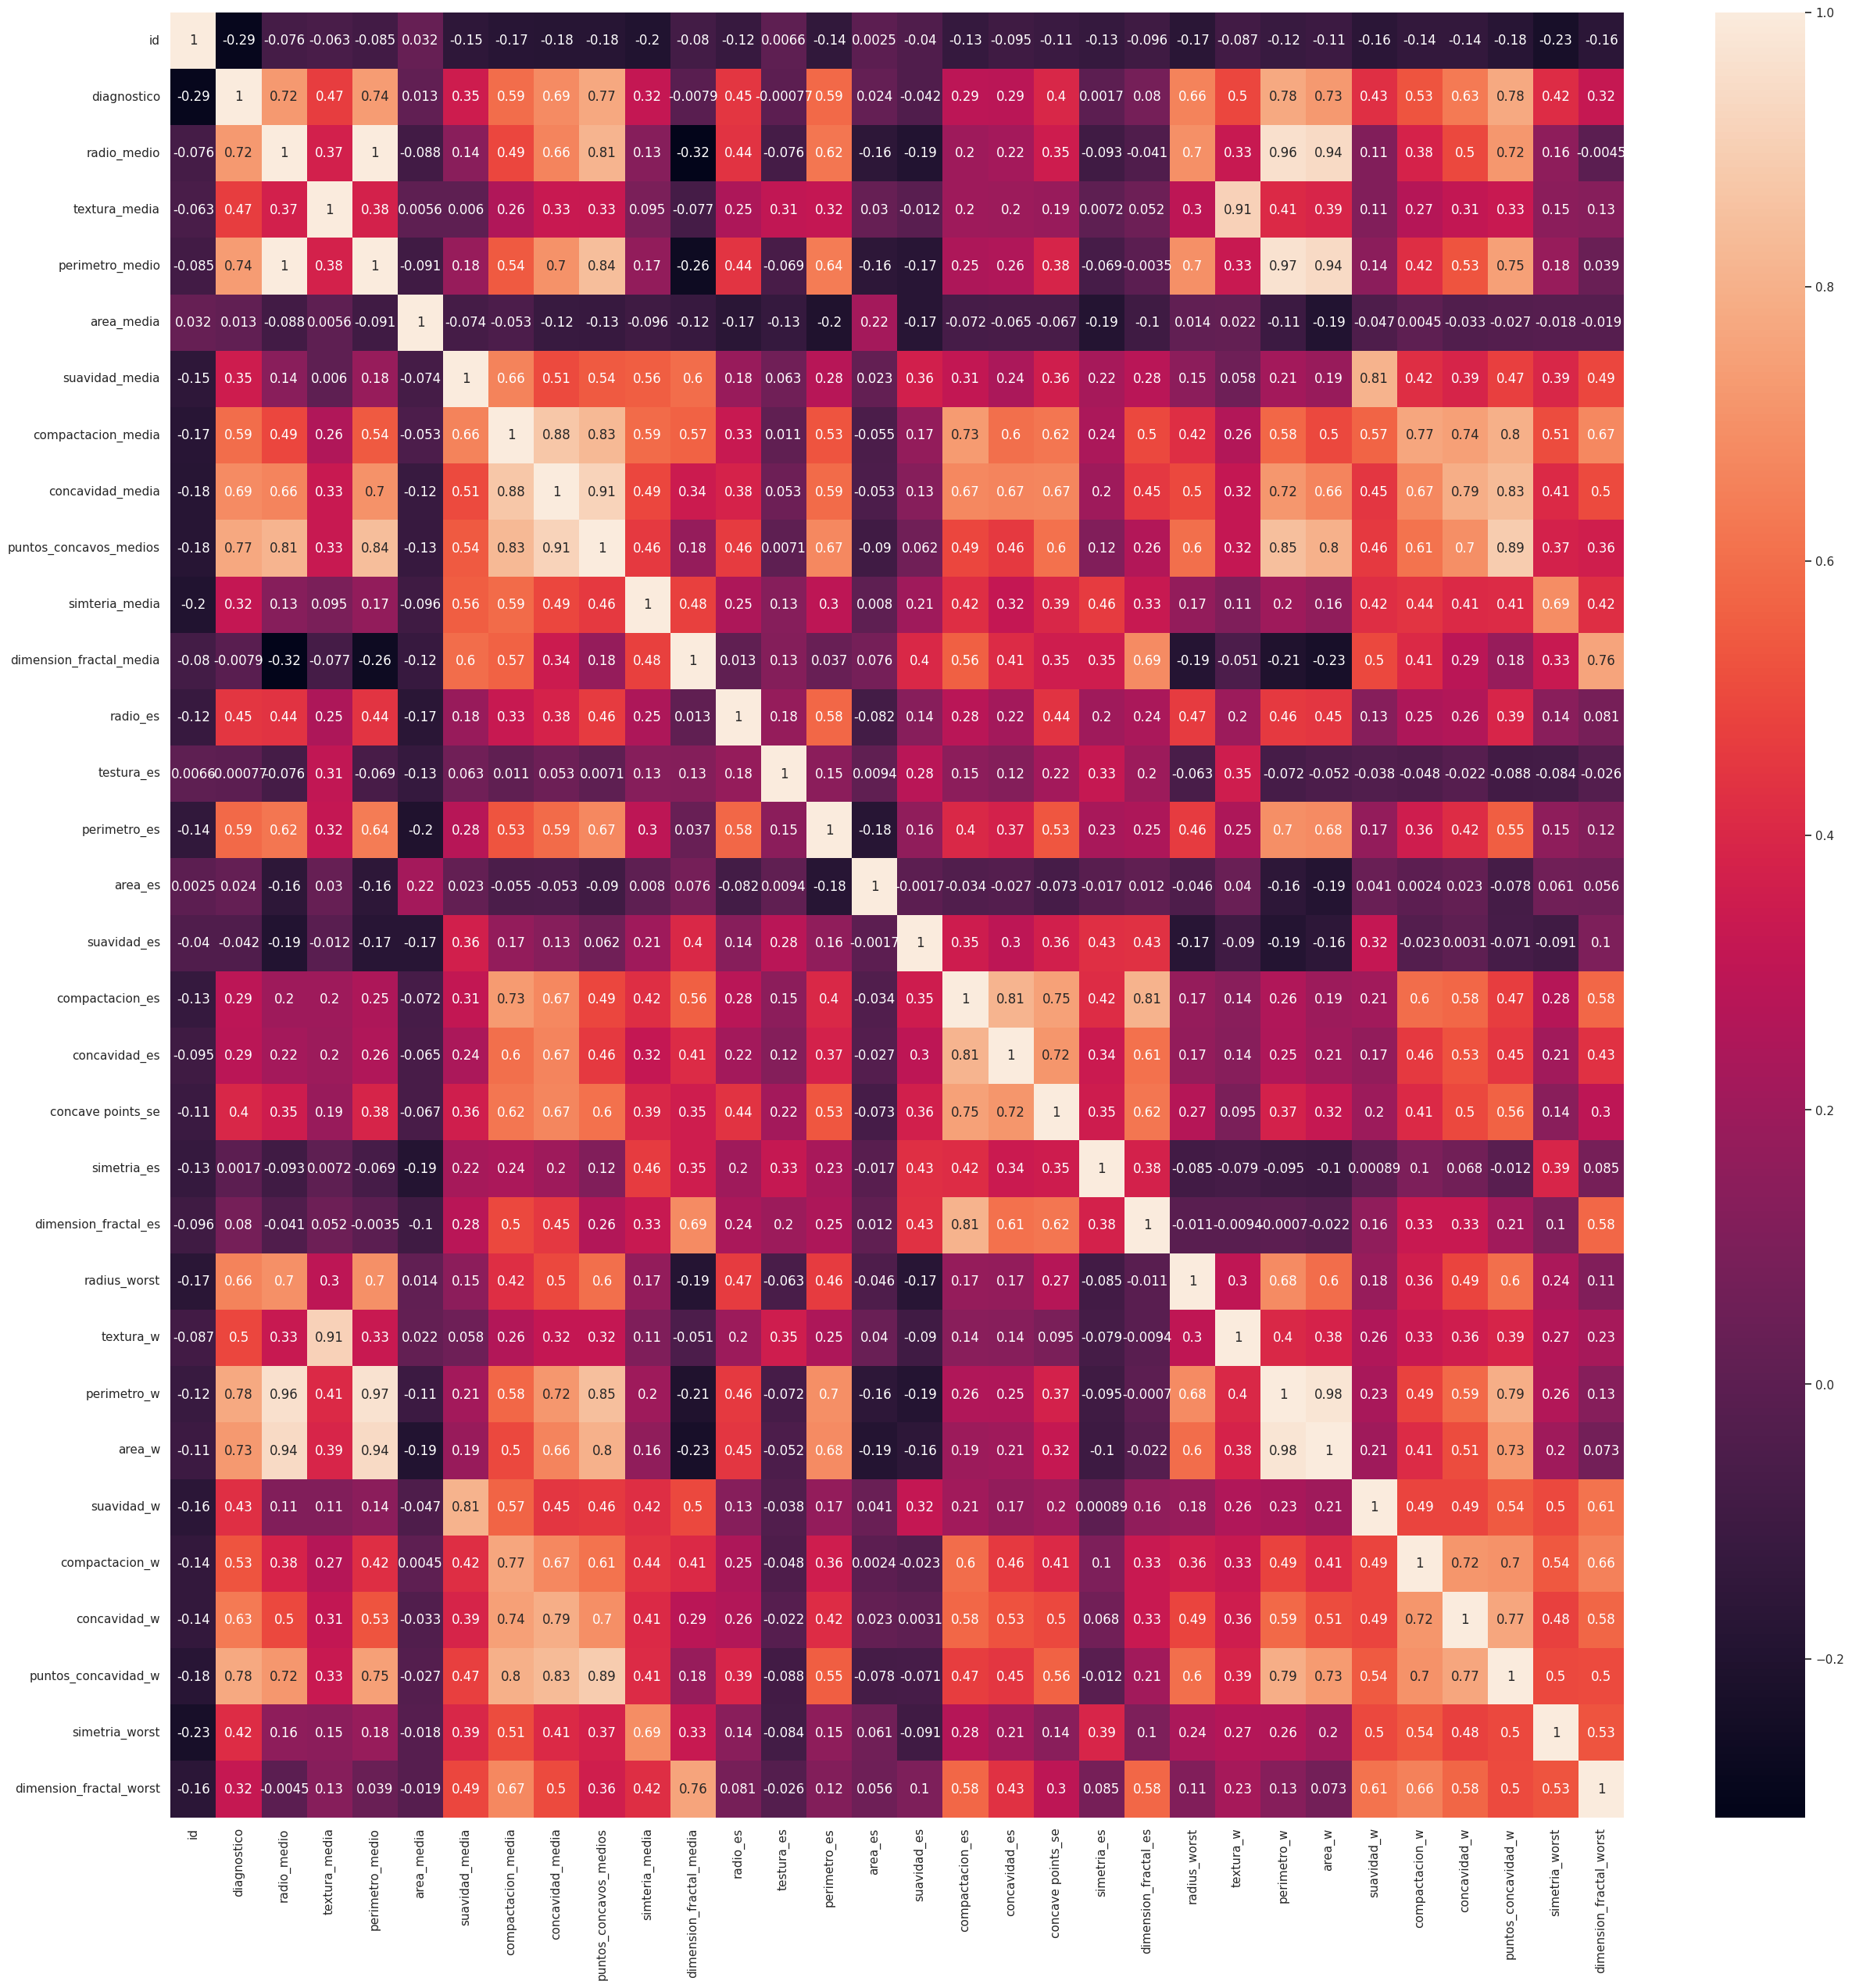

In [24]:
#Obtener correlación de variables para hacerse una idea en vez de tantear variables
plt.figure(figsize=(30,30))
corr= df2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True)
plt.show()

Variables similares
+ radio_medio == perimetro_medio == perimetro_w == area_w
+ radio_medio ~ puntos_concavos_medios (similar, sobre 80% de correlación líneal)
+ radio_medio ~ radius_worst ~ puntos_concavidad_w ~ concavidad_w (sobre el 70%)
+ compactacion_media ~ concavidad_media
+ dimension_media ~ dimension_fractal_worst
+ compactacion_media ~ compactacion_es
+ concavidad_es ~ concave points_se
+ compactacion_es ~ dimension_fractal_es
+ textura_media == textura_w
+ suavidad_media ~ suavidad_w
+ compactacion_media ~ compactacion_w

Se eliminan: perimetro_medio; perimetro_w; area_w; puntos_concavos_medios; radius_worst; puntos_concavidad_w; concavidad_w; concavidad_media; dimension_fractal_worst; compactacion_es; concave points_se; dimension_fractal_es; textura_w; suavidad_w; compactacion_w; id (se quita porque no aporta por definición)

## 4. Ingeniería de Características (Feature Engineering)

In [26]:
df3=df2.copy() #Este proceso puede ser o muy beneficioso o muy desastroso, por si acaso mejor hacer una nueva copia
sacar=["id","perimetro_medio", "perimetro_w","area_w", "puntos_concavos_medios","radius_worst", "puntos_concavidad_w","concavidad_w","concavidad_media","dimension_fractal_worst","compactacion_es","concave points_se","dimension_fractal_es", "textura_w", "suavidad_w","compactacion_w"] #Lo que explican lo explican en su mayoría otras variables
df3.drop(sacar, inplace=True, axis=1)
T2.drop(sacar, inplace=True, axis=1)

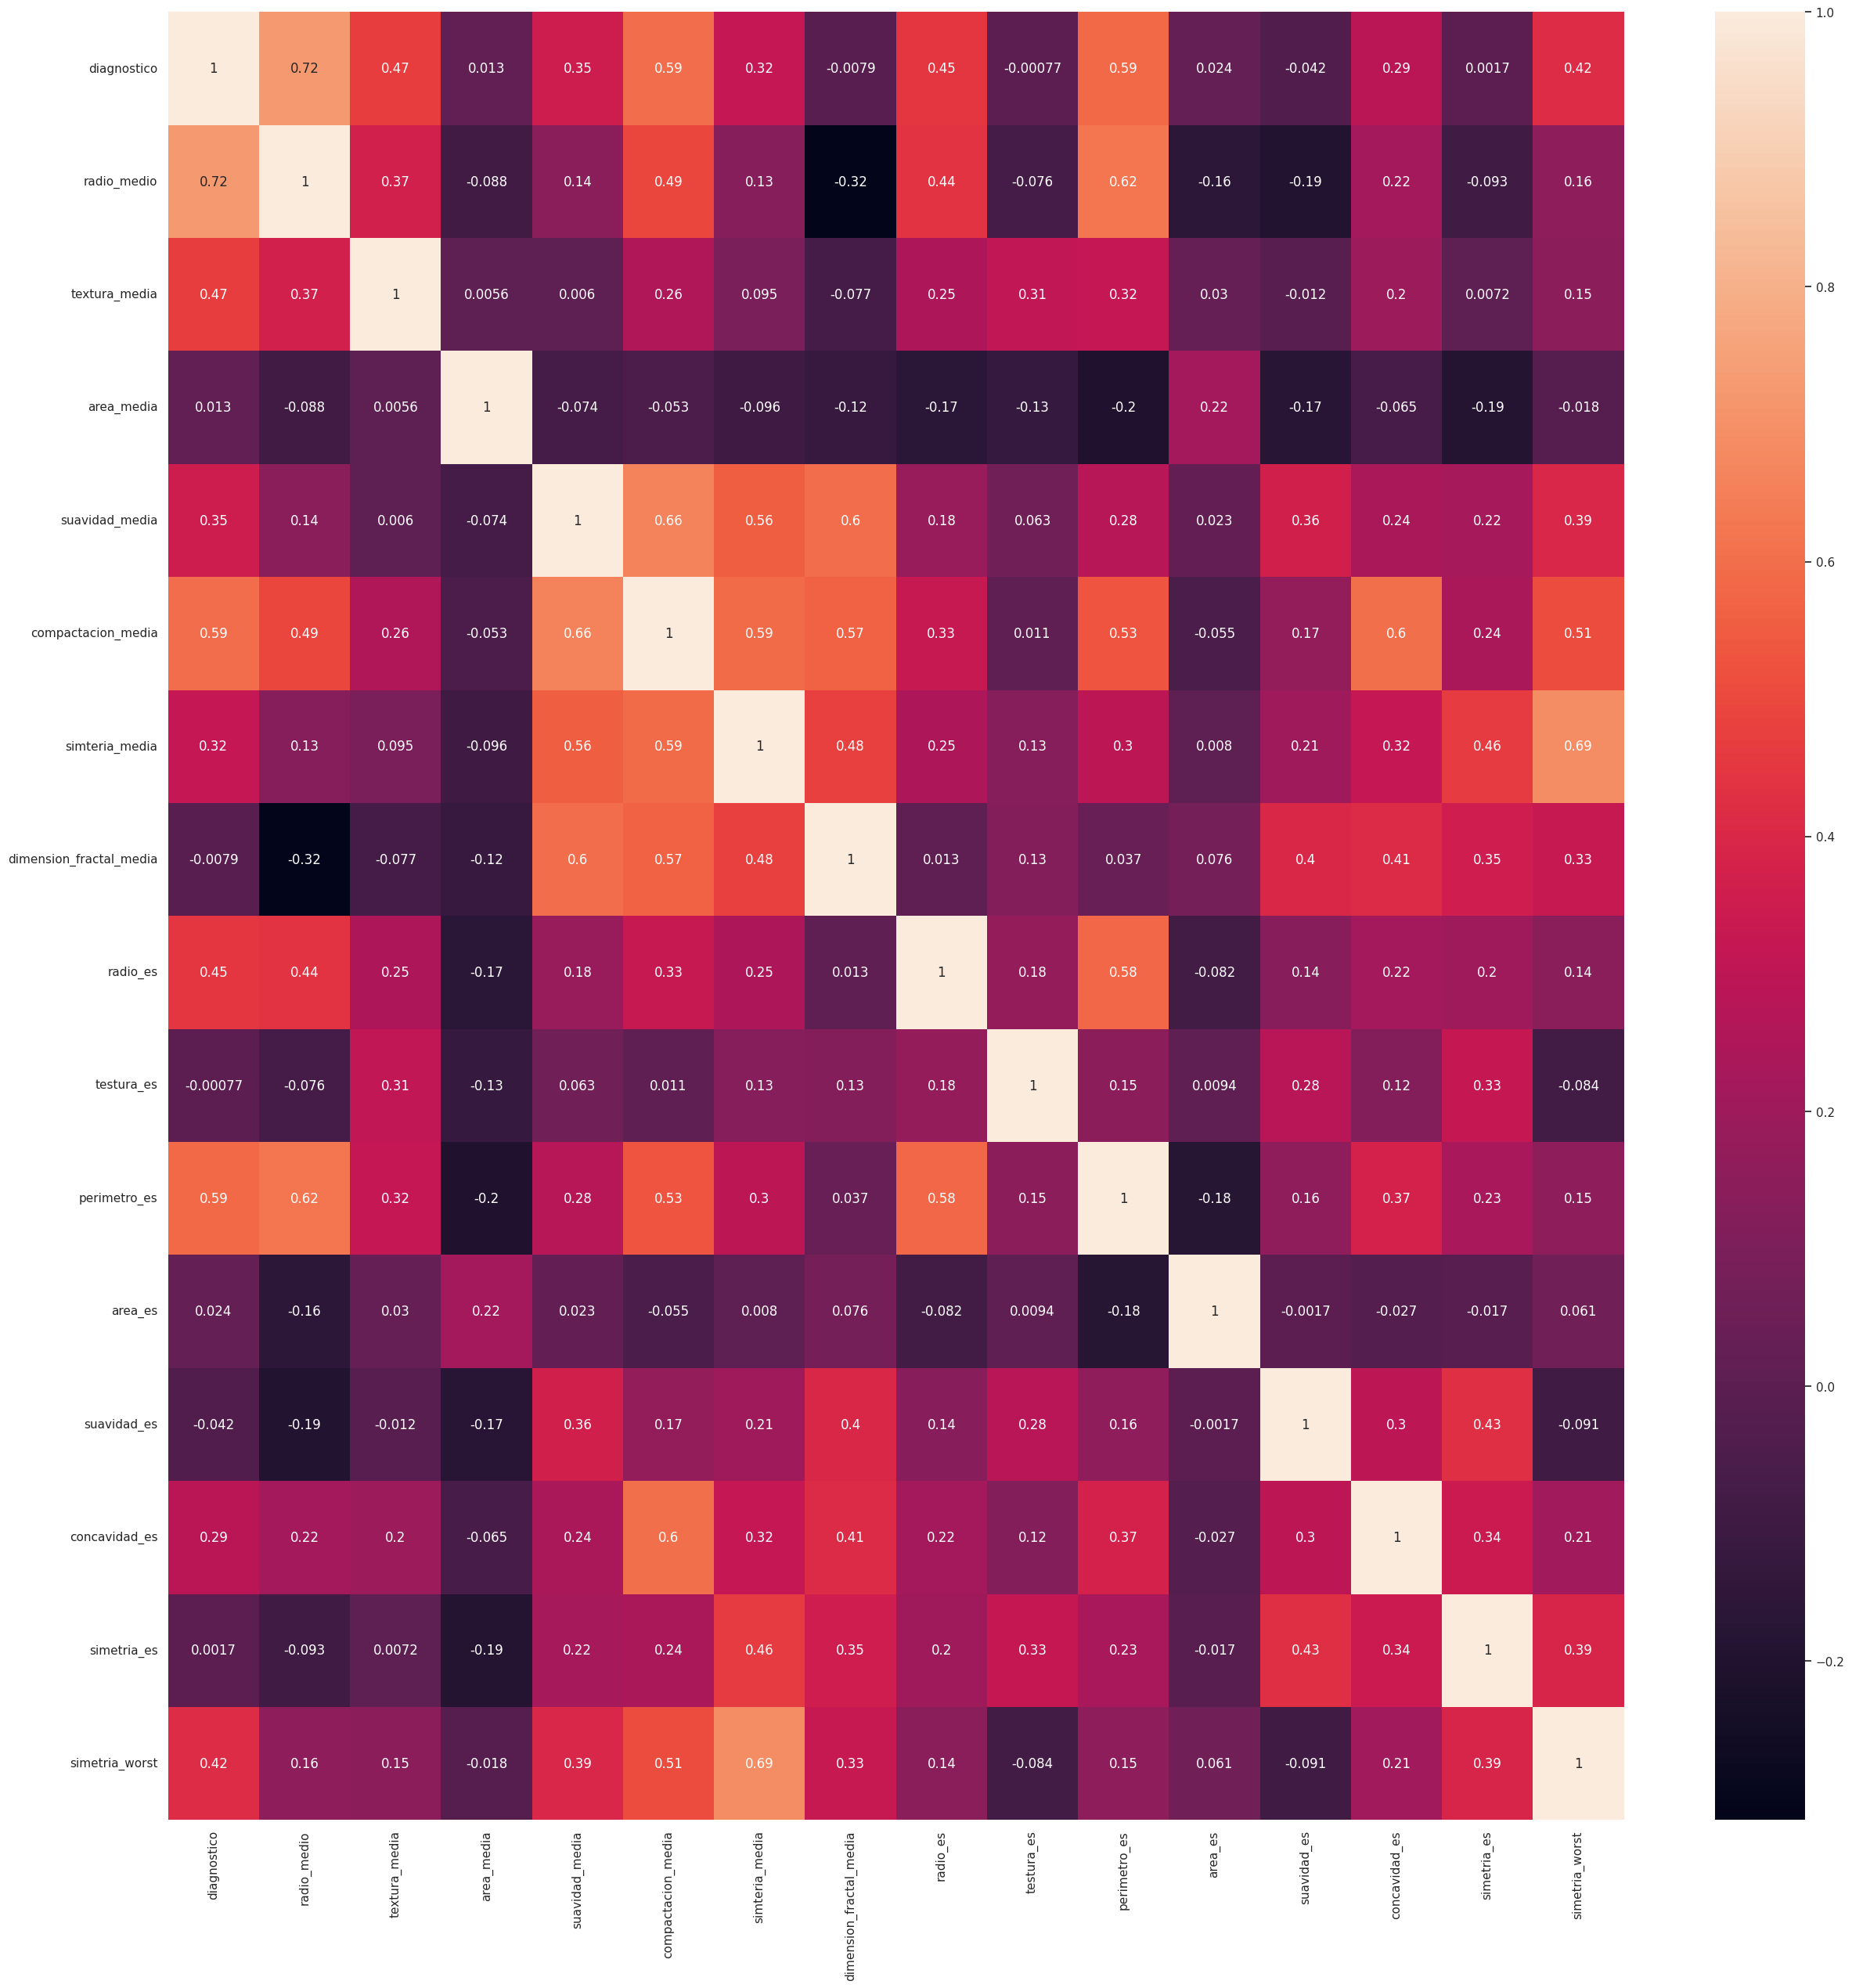

In [27]:
#Verificar
plt.figure(figsize=(30,30))
corr= df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True)
plt.show()

Ya que sobre un 70% de exactitud se considera un buen modelo, solo se eliminaron variables que entre si tuvieran dicha relación o superior. Solo variables de predicción, no con la variable a predecir.

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnostico              533 non-null    int64  
 1   radio_medio              533 non-null    float64
 2   textura_media            533 non-null    float64
 3   area_media               533 non-null    float64
 4   suavidad_media           533 non-null    float64
 5   compactacion_media       533 non-null    float64
 6   simteria_media           533 non-null    float64
 7   dimension_fractal_media  533 non-null    float64
 8   radio_es                 533 non-null    float64
 9   testura_es               533 non-null    float64
 10  perimetro_es             533 non-null    float64
 11  area_es                  533 non-null    float64
 12  suavidad_es              533 non-null    float64
 13  concavidad_es            533 non-null    float64
 14  simetria_es              5

Primero se genera el modelo con testeo interno y posteriormente se evaluará con "Testear"

Está claro que solo es necesaria una variable caracteristica de dimensión respectiva sobre cada aspecto del tumor (si se evalua el radio, solo es necesario radio_medio y no perimetro_medio, perimetro_w o radio_worst. Explican exáctamente lo mismo).

El crecimiento acelerado de un tumor indica principalmente su grado de benigno o maligno según el colegio de medicos. Pero un análisis exhaustivo de este puede dar un diagnostico o una aproximación a este.

## 5. Modelamiento

In [29]:
x = df3.iloc[:, 1:] #Variables de carácteristicas
y = df3["diagnostico"] #Variable a predecir

In [30]:
#Importamos la librería skearln para preparar los datos
from sklearn.model_selection import train_test_split #se importa solo lo necesario para no sobrecargar de información no necesaria el programa y procesamiento
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42,test_size = 0.2)
print(X_train.shape)
print(Y_train.shape)

(426, 15)
(426,)


In [31]:
#Usando criterio de vecino más cercano
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Se procede a ingresar los modelos a una variable
modelo= KNeighborsClassifier(n_neighbors = 5) #Decisión en base a cuantos vecinos
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
kn_mae = mean_absolute_error(Y_test, prediccion) #comparación que tan cerca/lejos estuvo la predicción
acc=metrics.accuracy_score(Y_test, prediccion) #Porcentaje de certeza
print("MAE KNN: %0.4f"% kn_mae)
print("Precisión KNN: %0.4f"% acc)

MAE KNN: 0.1028
Precisión KNN: 0.8972


La predicción del modelo resultó sobre el 80% lo cual es bastante bueno. Se procede a trabajar la base de datos de "Testear".

## 6. Testing

In [32]:
#Se carga la base de datos de testeo
x2 = T2.iloc[:, 1:] #Variables de carácteristicas
y2 = T2["diagnostico"] #Variable a predecir

In [33]:
predecir=modelo.predict(x2)
predecir

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [34]:
predicciones = pd.DataFrame({"id":Testear.id,"diagnostico":predecir})
predicciones

,id,diagnostico
0,633,0
1,634,1
2,635,0
3,636,0
4,637,1
5,638,1
6,639,0
7,640,0
8,641,1
9,642,0


In [35]:
predicciones["diagnostico"]=predicciones["diagnostico"].replace([1,0],("M","B"))#Porque así se definió originalmente
predicciones=pd.concat([predicciones,(Testear.iloc[:, 2:])], axis=1)
predicciones_limpias=pd.concat([predicciones,x2], axis=1)
predicciones

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radius_worst,textura_w,perimetro_w,area_w,suavidad_w,compactacion_w,concavidad_w,puntos_concavidad_w,simetria_worst,dimension_fractal_worst
0,633,B,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,...,11.62,26.51,76.43,407.5,0.14280,251.00000,0.21230,0.09861,0.2289,0.08278
1,634,M,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.208500,0.132200,...,24.30,25.48,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569
2,635,B,14.27,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,...,15.29,34.27,104.30,728.3,138.00000,0.27330,0.42340,0.13620,0.2698,0.08351
3,636,B,11.69,24.44,76.37,406.4,0.12360,0.15520,0.045150,0.045310,...,12.98,32.19,86.12,487.7,0.17680,0.32510,0.13950,0.13080,0.2803,0.09970
4,637,M,7729.00,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,...,9077.00,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938
5,638,M,7691.00,25.44,48.34,170.4,0.08668,0.11990,0.092520,0.013640,...,8678.00,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,279.0000,0.10660
6,639,B,11.54,14.44,74.65,402.9,0.09984,112.00000,0.067370,0.025940,...,12.26,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134
7,640,B,14.47,24.99,95.81,656.4,0.08837,123.00000,0.100900,0.038900,...,16.22,31.73,113.50,808.9,134.00000,0.42020,404.00000,0.12050,0.3187,0.10230
8,641,M,14.74,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,...,16.51,32.29,107.40,826.4,106.00000,0.13760,0.16110,0.10950,0.2722,0.06956
9,642,B,13.21,28.06,84.88,538.4,0.08671,0.06877,0.029870,0.032750,...,14.37,37.17,92.48,629.6,0.10720,0.13810,0.10620,0.07958,0.2473,0.06443


In [36]:
predicciones.to_csv("/workspaces/Principal/predicciones.csv", index=False)
predicciones_limpias.to_csv("/workspaces/Principal/prediciones_limpias.csv", index=False)